### Team Member
    Alan Xing ID: 101144347
    Chien-I Chao ID: 101135366
    Nicholas Rasmussen ID: 1839739

GitHub Link : https://github.com/Sup3000gt/Machine-Learning-Project

<center>

### Machine Learning Fundamental Project


</center>


In [89]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step1. Load and Preprocessing the Data

In [90]:
iris = datasets.load_iris()

In [91]:
# Create a DataFrame
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
df_iris['species'] = iris.target

# Map the target integers to the actual species names for better readability
df_iris['species'] = df_iris['species'].map(dict(enumerate(iris.target_names)))

# Show the DataFrame
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [92]:
# Split our X and Y
X = df_iris.drop('species', axis=1)
Y = df_iris['species']

#### Step 1.1 check if there is any NaN value

In [93]:
missing_value = X.isnull().sum()
# show if any missing value
missing_value

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### Step 1.2 Normalize the data to see if any outlier

In [94]:
# we will implement Z-score Normalize

def Z_scores(df): # take in a date frame as a parameter
    means = df.mean()
    stds = df.std()
    z_score = (df - means) / stds
    return z_score


In [95]:
normalized_df = Z_scores(X)
normalized_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


#### Step 1.3 Scatter Plot Visualizations

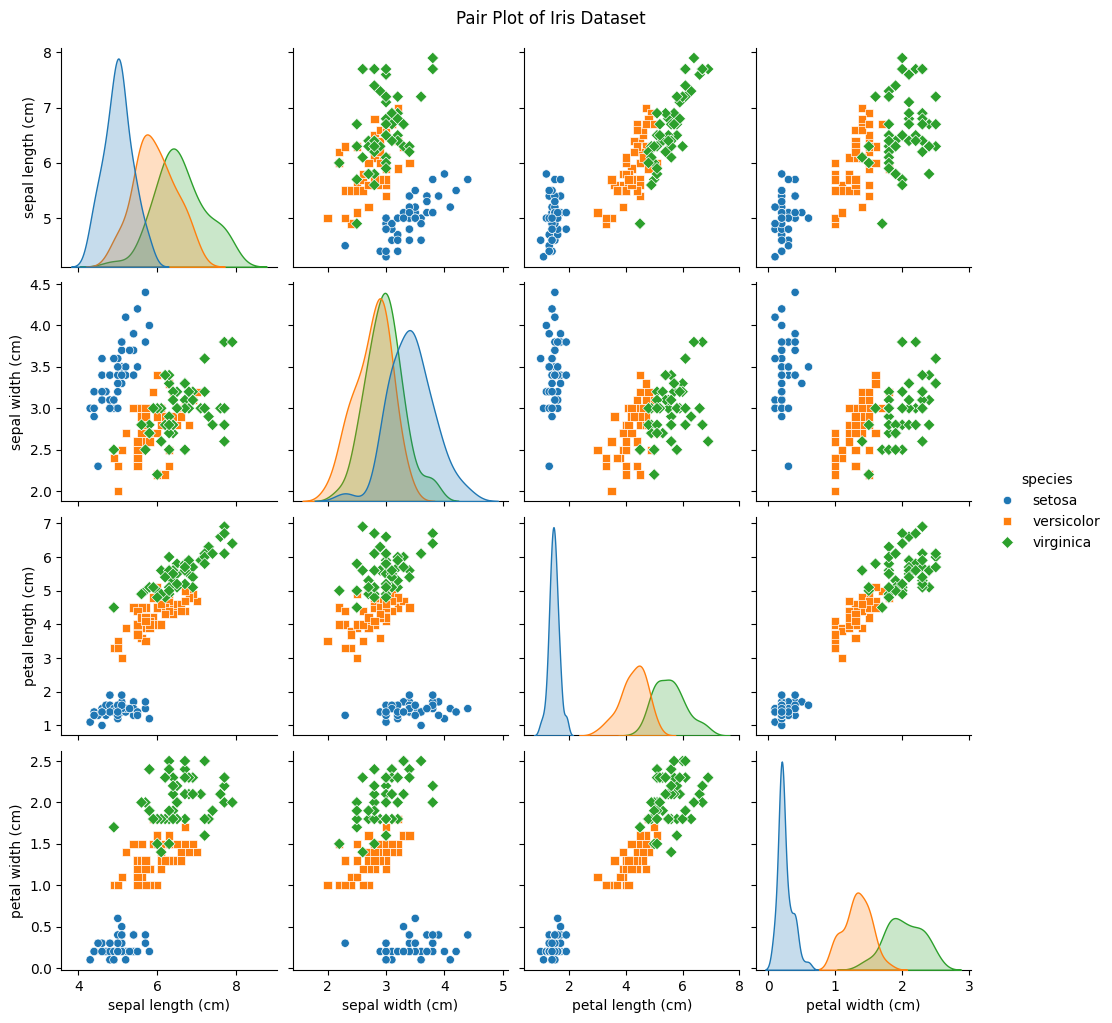

In [96]:
# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Pair Plot
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)

# Show the plot
plt.show()

#### Step 1.Correlation Visualization

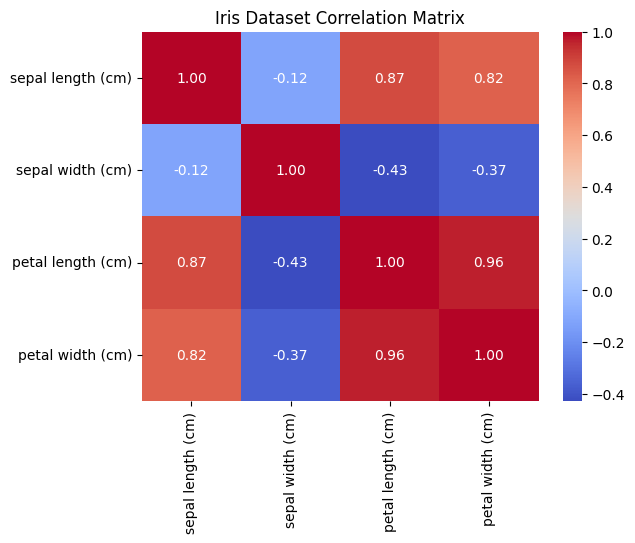

In [97]:
correlation_matrix = np.corrcoef(iris.data.T)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Iris Dataset Correlation Matrix')
plt.show()

#### Step 1.5 Split the data for training

In [99]:
from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, Y, test_size=0.2, random_state=42)

# Double the training data
X_train_doubled = np.vstack((X_train, X_train, X_train, X_train))
y_train_doubled = np.append(y_train, y_train)
y_train_doubled = np.append(y_train_doubled, y_train)
y_train_doubled = np.append(y_train_doubled, y_train)

# Add Gaussian noise to the training data
mean = 0
std_dev = 0.05
noise = np.random.normal(mean, std_dev, size=X_train_doubled.shape)
X_train_noisy = X_train_doubled + noise

# check the shape
(X_train_noisy.shape, X_test.shape), (y_train_doubled.shape, y_test.shape)

(((480, 4), (30, 4)), ((480,), (30,)))

### Model building/Cross-Validation/Evaluation

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_validate

#### K-fold Cross-validation with shuffle and K= 5

In [101]:
# set up K-fold Cross-validation with shuffle
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### List of Kernels we want to try

In [102]:
kernels = ['linear', 'rbf', 'poly']

#### Evaluation Metrics

In [103]:
# Accuracy, Precision, Recall, F1 scores
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

#### Functions to evaluate different kernels

In [104]:
"""
this function will take in 4 hyper-parameters
- Kernels
- X_train
- y_train
- Cross-Validation we define early
"""
def eval_kernels(kernels, X_train, y_train, cv):
    # dictionary to save the result
    results = {}
    
    for kernel in kernels:
        # create our support vector classifier
        model = SVC(kernel = kernel, random_state=42)
        cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=metrics)
        scores = {
            'Accuracy': round(cv_results['test_accuracy'].mean() * 100, 2),
            'Precision': round(cv_results['test_precision_macro'].mean() * 100, 2),
            'Recall': round(cv_results['test_recall_macro'].mean() * 100, 2),
            'F1 Score': round(cv_results['test_f1_macro'].mean() * 100, 2)
        }
        results[kernel.capitalize()] = scores
    return results

#### Call our Functions

In [105]:
"""
result are now a form of dictionary with kernel name as key, and value is another dictionary
with different evaluation metrics as a key and value is the float represent the numbers.
"""
results = eval_kernels(kernels, X_train_noisy, y_train_doubled, kf)

In [106]:
# display our result
for kernel, metrics in results.items():
    print(f"{kernel} Kernel:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}%")
    print()  # better separation

Linear Kernel:
  Accuracy: 96.88%
  Precision: 96.92%
  Recall: 96.96%
  F1 Score: 96.82%

Rbf Kernel:
  Accuracy: 97.5%
  Precision: 97.52%
  Recall: 97.6%
  F1 Score: 97.47%

Poly Kernel:
  Accuracy: 95.62%
  Precision: 95.74%
  Recall: 95.66%
  F1 Score: 95.57%



### Performance Visualizations

In [107]:
from sklearn.metrics import *

c:\users\nick_\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


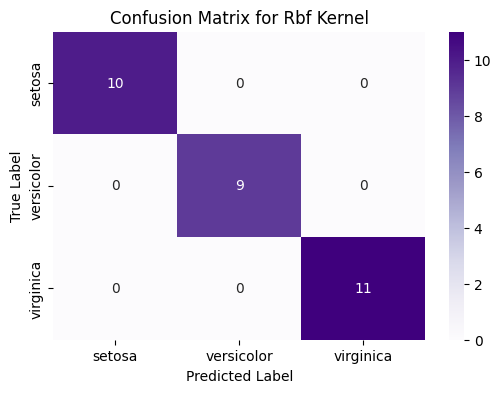

In [108]:
# Since Linear Kernel have best accuracy, let's use it

kernel = 'rbf'
model = SVC(kernel=kernel, random_state=42)

# Fit the model
model.fit(X_train_noisy, y_train_doubled)

# Prediction
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using matplotlib and seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {kernel.capitalize()} Kernel')
plt.show()

